In [1]:
#importing the files needed for the model (DJIA Table)
from google.colab import files
uploaded=files.upload()

Saving DJIA_table.csv to DJIA_table.csv


In [0]:
#importing the dependencies needed
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

## **Feature extraction for LSTM model.**

In [3]:
#visualizing the data
dtf=pd.read_csv("DJIA_table.csv")
dtf = dtf.sort_values(by = 'Date')
dtf.head()

,Date,Open,High,Low,Close,Volume,Adj Close
1988,2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
1987,2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
1986,2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
1985,2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
1984,2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688


In [4]:
#Input Data
df=np.array(dtf.loc[:,["Open","Close","Adj Close"]])
pd.DataFrame(df,columns=["Open","Close","Adj Close"]).head()

,Open,Close,Adj Close
0,11432.089844,11734.320312,11734.320312
1,11729.669922,11782.349609,11782.349609
2,11781.700195,11642.469727,11642.469727
3,11632.809570,11532.959961,11532.959961
4,11532.070312,11615.929688,11615.929688


In [5]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(df)
pd.DataFrame(df).head()

,0,1,2
0,0.415114,0.440894,0.440894
1,0.440401,0.444976,0.444976
2,0.444822,0.433087,0.433087
3,0.432170,0.423779,0.423779
4,0.423610,0.430832,0.430832



  
   <img src="https://drive.google.com/uc?id=1yD4BZYeB2S_hebpRVJ3fewQtsC4uNV2g">

In [6]:
#Splitting the data into test and train sets

split=0.15 #setting the split ratio for test_size
test_size=int(df.shape[0]*split)
test_size
train_size=int(df.shape[0]-test_size)
print("train size =",train_size,"   test_size =",test_size)

train size = 1691    test_size = 298


In [0]:
#Splitting the data into different arrays for respective LSTM models to predict their foth values.
#Raw data for feature extraction(Training)
open_X_train=df[:train_size,0:1]
close_X_train=df[:train_size,1:2]
adj_X_train=df[:train_size,2:3]

#Raw data for feature extraction(Testing)
open_X_test=df[train_size:,0:1]
close_X_test=df[train_size:,1:2]
adj_X_test=df[train_size:,2:3]

In [8]:
open_X_train.shape,open_X_test.shape

((1691, 1), (298, 1))

In [0]:
#Creating DataSets of 60 timesteps for LSTM model to predict the forth value.
ts=60
def data_generate(raw_data):
  X_data=[]
  Y_data=[]
  for i in range(ts,raw_data.shape[0]):
    X_data.append(raw_data[i-ts:i,:])
    Y_data.append(raw_data[i,:])
  X_data=np.array(X_data)
  Y_data=np.array(Y_data)
  return X_data, Y_data


   <img src="https://drive.google.com/uc?id=1vKznVmaYV7euFzjsoQHQM4OXoQbhlqtW" algin=left>

In [0]:
#Training data for LSTM model
open_X_train_gen, open_Y_train_gen = data_generate(open_X_train)
close_X_train_gen, close_Y_train_gen = data_generate(close_X_train)
adj_X_train_gen, adj_Y_train_gen = data_generate(adj_X_train)

#Testing data for LSTM model
open_X_test_gen, open_Y_test_gen = data_generate(open_X_test)
close_X_test_gen, close_Y_test_gen = data_generate(close_X_test)
adj_X_test_gen, adj_Y_test_gen = data_generate(adj_X_test)



In [11]:
open_X_train_gen.shape,open_X_train_gen.shape

((1631, 60, 1), (1631, 60, 1))

In [12]:
#Visualizing the generated training data(X)
pd.DataFrame(close_X_train_gen.reshape(train_size-ts,ts)).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,0.440894,0.444976,0.433087,0.423779,0.430832,0.434569,0.419226,0.408105,0.413960,0.415046,0.431863,0.411310,0.413572,0.421191,0.439267,0.424714,0.422416,0.423773,0.394479,0.397261,0.421891,0.398091,0.401337,0.415344,0.414348,0.371469,0.383497,0.345303,0.380154,0.411496,0.379814,0.366085,0.363621,0.380355,0.390646,0.324547,0.365787,0.364122,0.334525,0.321141,0.289703,0.246492,0.230427,0.172723,0.161843,0.241435,0.234922,0.172614,0.206727,0.195929,0.231050,0.211350,0.167625,0.182247,0.155703,0.138434,0.214024,0.207721,0.223847,0.236114
1,0.444976,0.433087,0.423779,0.430832,0.434569,0.419226,0.408105,0.413960,0.415046,0.431863,0.411310,0.413572,0.421191,0.439267,0.424714,0.422416,0.423773,0.394479,0.397261,0.421891,0.398091,0.401337,0.415344,0.414348,0.371469,0.383497,0.345303,0.380154,0.411496,0.379814,0.366085,0.363621,0.380355,0.390646,0.324547,0.365787,0.364122,0.334525,0.321141,0.289703,0.246492,0.230427,0.172723,0.161843,0.241435,0.234922,0.172614,0.206727,0.195929,0.231050,0.211350,0.167625,0.182247,0.155703,0.138434,0.214024,0.207721,0.223847,0.236114,0.235674
2,0.433087,0.423779,0.430832,0.434569,0.419226,0.408105,0.413960,0.415046,0.431863,0.411310,0.413572,0.421191,0.439267,0.424714,0.422416,0.423773,0.394479,0.397261,0.421891,0.398091,0.401337,0.415344,0.414348,0.371469,0.383497,0.345303,0.380154,0.411496,0.379814,0.366085,0.363621,0.380355,0.390646,0.324547,0.365787,0.364122,0.334525,0.321141,0.289703,0.246492,0.230427,0.172723,0.161843,0.241435,0.234922,0.172614,0.206727,0.195929,0.231050,0.211350,0.167625,0.182247,0.155703,0.138434,0.214024,0.207721,0.223847,0.236114,0.235674,0.261635
3,0.423779,0.430832,0.434569,0.419226,0.408105,0.413960,0.415046,0.431863,0.411310,0.413572,0.421191,0.439267,0.424714,0.422416,0.423773,0.394479,0.397261,0.421891,0.398091,0.401337,0.415344,0.414348,0.371469,0.383497,0.345303,0.380154,0.411496,0.379814,0.366085,0.363621,0.380355,0.390646,0.324547,0.365787,0.364122,0.334525,0.321141,0.289703,0.246492,0.230427,0.172723,0.161843,0.241435,0.234922,0.172614,0.206727,0.195929,0.231050,0.211350,0.167625,0.182247,0.155703,0.138434,0.214024,0.207721,0.223847,0.236114,0.235674,0.261635,0.220327
4,0.430832,0.434569,0.419226,0.408105,0.413960,0.415046,0.431863,0.411310,0.413572,0.421191,0.439267,0.424714,0.422416,0.423773,0.394479,0.397261,0.421891,0.398091,0.401337,0.415344,0.414348,0.371469,0.383497,0.345303,0.380154,0.411496,0.379814,0.366085,0.363621,0.380355,0.390646,0.324547,0.365787,0.364122,0.334525,0.321141,0.289703,0.246492,0.230427,0.172723,0.161843,0.241435,0.234922,0.172614,0.206727,0.195929,0.231050,0.211350,0.167625,0.182247,0.155703,0.138434,0.214024,0.207721,0.223847,0.236114,0.235674,0.261635,0.220327,0.182633


In [13]:
#Output for each dataset(Y)
pd.DataFrame(close_Y_train_gen.reshape(1631,1)).head()

,0
0,0.235674
1,0.261635
2,0.220327
3,0.182633
4,0.203714


## **Creating the LSTM models for prediciton of different feature.**

<img src="https://drive.google.com/uc?id=1LjvDxF_XYOP9R6OszSDTKGk4Gos2k79o">

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.callbacks import Callback, ModelCheckpoint

Using TensorFlow backend.


In [15]:
#Model for prediction of open value for next day using past 60 days data.
open_model=Sequential()
open_model.add(LSTM(units=50,return_sequences=True, input_shape=(open_X_train_gen.shape[1],1)))
#open_model.add(Activation("relu"))
open_model.add(Dropout(0.2))
open_model.add(LSTM(units=50,return_sequences=True))
#open_model.add(Activation("relu"))
open_model.add(Dropout(0.2))
open_model.add(LSTM(units=50,return_sequences=True))
#open_model.add(Activation("relu"))
open_model.add(Dropout(0.2))
open_model.add(LSTM(units=50))
open_model.add(Dense(units=1))

W0711 11:57:56.620976 140620172404608 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0711 11:57:56.667188 140620172404608 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0711 11:57:56.673633 140620172404608 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0711 11:57:56.860026 140620172404608 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0711 11:57:56.868411 

In [16]:
open_X_train_gen.shape,open_Y_train_gen.shape

((1631, 60, 1), (1631, 1))

In [17]:
#compiling the RNN(LSTM)FOR OPENing
open_model.compile(optimizer='adam',loss='mean_squared_error')
history1=open_model.fit(open_X_train_gen,open_Y_train_gen,epochs=40,batch_size=32,validation_split=0.2,verbose=2)

W0711 11:58:03.325769 140620172404608 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0711 11:58:03.704350 140620172404608 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0711 11:58:05.821483 140620172404608 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 1304 samples, validate on 327 samples
Epoch 1/40
 - 19s - loss: 0.0282 - val_loss: 0.0029
Epoch 2/40
 - 14s - loss: 0.0017 - val_loss: 7.5810e-04
Epoch 3/40
 - 14s - loss: 0.0014 - val_loss: 8.2065e-04
Epoch 4/40
 - 14s - loss: 0.0014 - val_loss: 0.0012
Epoch 5/40
 - 14s - loss: 0.0013 - val_loss: 0.0011
Epoch 6/40
 - 14s - loss: 0.0013 - val_loss: 9.0494e-04
Epoch 7/40
 - 14s - loss: 0.0012 - val_loss: 0.0010
Epoch 8/40
 - 14s - loss: 0.0014 - val_loss: 0.0041
Epoch 9/40
 - 14s - loss: 0.0012 - val_loss: 7.4187e-04
Epoch 10/40
 - 14s - loss: 0.0011 - val_loss: 7.3274e-04
Epoch 11/40
 - 14s - loss: 0.0011 - val_loss: 8.2280e-04
Epoch 12/40
 - 14s - loss: 0.0012 - val_loss: 0.0011
Epoch 13/40
 - 14s - loss: 0.0011 - val_loss: 0.0017
Epoch 14/40
 - 14s - loss: 0.0011 - val_loss: 8.1276e-04
Epoch 15/40
 - 14s - loss: 0.0011 - val_loss: 9.2084e-04
Epoch 16/40
 - 14s - loss: 0.0012 - val_loss: 7.2220e-04
Epoch 17/40
 - 14s - loss: 9.6647e-04 - val_loss: 6.9369e-04
Epoch 18/40
 - 14

In [0]:
#Model for prediction of close value for next day using past 60 days data.
close_model = Sequential()
close_model.add(LSTM(units=50,return_sequences=True, input_shape=(close_X_train_gen.shape[1],1)))
close_model.add(Dropout(0.2))
close_model.add(LSTM(units=50,return_sequences=True))
close_model.add(Dropout(0.2))
close_model.add(LSTM(units=50,return_sequences=True))
close_model.add(Dropout(0.2))
close_model.add(LSTM(units=50))
close_model.add(Dense(units=1))

In [19]:
#compiling the RNN(LSTM)FOR CLOSEing
close_model.compile(optimizer='adam',loss='mean_squared_error')
history2=close_model.fit(close_X_train_gen,close_Y_train_gen,epochs=40,batch_size=20,validation_split=0.2,verbose=2)

Train on 1304 samples, validate on 327 samples
Epoch 1/40
 - 25s - loss: 0.0204 - val_loss: 7.7599e-04
Epoch 2/40
 - 22s - loss: 0.0015 - val_loss: 0.0016
Epoch 3/40
 - 23s - loss: 0.0013 - val_loss: 7.5387e-04
Epoch 4/40
 - 23s - loss: 0.0015 - val_loss: 0.0018
Epoch 5/40
 - 23s - loss: 0.0014 - val_loss: 9.9713e-04
Epoch 6/40
 - 22s - loss: 0.0012 - val_loss: 7.2909e-04
Epoch 7/40
 - 22s - loss: 0.0012 - val_loss: 7.5226e-04
Epoch 8/40
 - 23s - loss: 0.0014 - val_loss: 0.0030
Epoch 9/40
 - 22s - loss: 0.0013 - val_loss: 0.0020
Epoch 10/40
 - 22s - loss: 0.0010 - val_loss: 0.0035
Epoch 11/40
 - 22s - loss: 0.0011 - val_loss: 6.7429e-04
Epoch 12/40
 - 23s - loss: 9.9283e-04 - val_loss: 6.6547e-04
Epoch 13/40
 - 22s - loss: 0.0011 - val_loss: 0.0012
Epoch 14/40
 - 22s - loss: 9.3144e-04 - val_loss: 0.0017
Epoch 15/40
 - 22s - loss: 0.0011 - val_loss: 0.0028
Epoch 16/40
 - 22s - loss: 0.0011 - val_loss: 0.0012
Epoch 17/40
 - 22s - loss: 8.5215e-04 - val_loss: 6.4087e-04
Epoch 18/40
 - 23

In [0]:
#Model for prediction of adjusted value for next day using past 60 days data.
adj_model = Sequential()
adj_model.add(LSTM(units=50,return_sequences=True, input_shape=(adj_X_train_gen.shape[1],1)))
#adj_model.add(Activation("relu"))
adj_model.add(Dropout(0.2))
adj_model.add(LSTM(units=50,return_sequences=True))
adj_model.add(Dropout(0.2))
adj_model.add(LSTM(units=50,return_sequences=True))
adj_model.add(Dropout(0.2))
adj_model.add(LSTM(units=50))
adj_model.add(Dense(units=1))

## **Visualizing the test and train data**

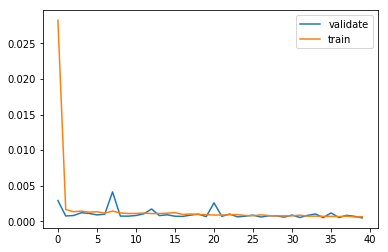

In [47]:
#Visualizing the different loss and validation loss for the open data
from matplotlib import pyplot
pyplot.plot(history1.history['val_loss'], label='validate')
pyplot.plot(history1.history['loss'], label='train')
pyplot.legend()

In [0]:
#Predicting the corresponding values 
open_Y_pred=open_model.predict(open_X_test_gen)
close_Y_pred=close_model.predict(close_X_test_gen)
#volume_Y_pred=volume_model.predict(volume_X_test_gen)
adj_Y_pred=adj_model.predict(adj_X_test_gen)

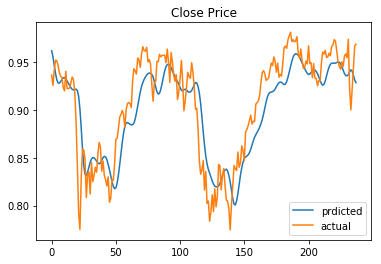

In [49]:
#Predicted vs Actual Close Price
plt.plot(close_Y_pred,label="prdicted")
plt.plot(close_Y_test_gen,label="actual")
plt.title("Close Price")
# plt.xlim(50,75)
plt.legend()

## **ANN Model**

<img src = "https://drive.google.com/uc?id=1BARwil5waakVARRs4EQ6gH1-eRPZtdI9">

In [50]:
from google.colab import files
setiment_file=files.upload()

Saving Polarity Score.csv to Polarity Score (1).csv


In [148]:
#Polarity Score
senti=pd.read_csv("Polarity Score.csv")
senti.head()

,Unnamed: 0,Date,Polarity Score(Scaled),Polarity Score(Unscaled),Label
0,0,2008-08-08,-0.852308,-0.733084,0
1,1,2008-08-11,0.964776,0.996928,1
2,2,2008-08-12,-1.056889,-0.927862,0
3,3,2008-08-13,-0.854806,-0.735463,0
4,4,2008-08-14,0.967997,0.999994,1


In [149]:
data_ann_train=(senti.iloc[(train_size+ts):(senti.shape[0]-25),2:3].values)*7
data_ann_train=np.hstack((data_ann_train,open_Y_pred[:data_ann_train.shape[0],:],close_Y_pred[:data_ann_train.shape[0],:]))
pd.DataFrame(data_ann_train,columns=["s.polarity","open_Y_pred","close_Y_pred"]).head()

,s.polarity,open_Y_pred,close_Y_pred
0,-7.447710,0.974291,0.962259
1,-7.923763,0.975928,0.955808
2,6.562912,0.975769,0.947229
3,5.583990,0.973657,0.938503
4,-7.858744,0.970095,0.931860


In [150]:
#creating Y for ANN model
adj_Y_test_gen=adj_Y_test_gen.reshape(-1,1)
adj_Y_test_gen_train=adj_Y_test_gen[:data_ann_train.shape[0],:]
adj_Y_test_gen_test=adj_Y_test_gen[data_ann_train.shape[0]:,:]
adj_Y_test_gen_test.shape

(25, 1)

In [151]:
data_ann_train=data_ann_train.reshape(3,-1)
adj_Y_test_gen_train.shape,adj_Y_test_gen_test.shape

((213, 1), (25, 1))

In [152]:
model=Sequential()
from keras import activations
from keras.layers import Dropout
model.add(Dense(40,activation=activations.relu,input_shape=(3,)))
# model.add(Dropout(0.05))
model.add(Dense(30,activation=activations.relu))
# model.add(Dropout(0.05))
model.add(Dense(50,activation=activations.relu))
# model.add(Dropout(0.05))
model.add(Dense(100,activation=activations.relu))
#model.add(Dense(100,activation=activations.relu))
# model.add(Dropout(0.05))
model.add(Dense(50,activation=activations.relu))
# model.add(Dropout(0.05))
model.add(Dense(10,activation=activations.relu))
# model.add(Dropout(0.05))
model.add(Dense(1,activation=activations.sigmoid))
model.compile(optimizer='adam',loss="mean_absolute_error")
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_88 (Dense)             (None, 40)                160       
_________________________________________________________________
dense_89 (Dense)             (None, 30)                1230      
_________________________________________________________________
dense_90 (Dense)             (None, 50)                1550      
_________________________________________________________________
dense_91 (Dense)             (None, 100)               5100      
_________________________________________________________________
dense_92 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_93 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_94 (Dense)             (None, 1)                 11        
Total para

In [153]:
data_ann_train=data_ann_train.reshape(-1,3)
adj_Y_test_gen_train=adj_Y_test_gen_train.reshape(-1,1)
adj_Y_test_gen_train.shape

(213, 1)

In [154]:
#Training the ANN model
model.fit(data_ann_train,adj_Y_test_gen_train,epochs=100,verbose=1,validation_split=0.2)

Train on 170 samples, validate on 43 samples
Epoch 1/100
170/170 [==============================] - 3s 19ms/step - loss: 0.2420 - val_loss: 0.1473
Epoch 2/100
170/170 [==============================] - 0s 199us/step - loss: 0.0624 - val_loss: 0.0165
Epoch 3/100
170/170 [==============================] - 0s 188us/step - loss: 0.0681 - val_loss: 0.0138
Epoch 4/100
170/170 [==============================] - 0s 180us/step - loss: 0.0694 - val_loss: 0.0175
Epoch 5/100
170/170 [==============================] - 0s 196us/step - loss: 0.0534 - val_loss: 0.0546
Epoch 6/100
170/170 [==============================] - 0s 185us/step - loss: 0.0530 - val_loss: 0.0745
Epoch 7/100
170/170 [==============================] - 0s 219us/step - loss: 0.0537 - val_loss: 0.0549
Epoch 8/100
170/170 [==============================] - 0s 195us/step - loss: 0.0507 - val_loss: 0.0354
Epoch 9/100
170/170 [==============================] - 0s 180us/step - loss: 0.0513 - val_loss: 0.0386
Epoch 10/100
170/170 [=======

In [155]:
data_ann_test=senti.iloc[(senti.shape[0]-25):,2:3].values
# data_ann_test.shape
data_ann_test=np.hstack((data_ann_test,open_Y_pred[data_ann_train.shape[0]:,:],close_Y_pred[data_ann_train.shape[0]:,:]))
pd.DataFrame(data_ann_test,columns=["s.polarity","open_Y_pred","close_Y_pred"]).head()
data_ann_test.shape

(25, 3)

In [0]:
data_ann_pred_with_ps=model.predict(data_ann_test)+0.02

## **ANN Model Without Polarity**

<img src = "https://drive.google.com/uc?id=1Ivo1qYzR5NuT63Bo4ZQsIb--c9ct0TMS">

In [157]:
model=Sequential()
from keras import activations
from keras.layers import Dropout
model.add(Dense(40,activation=activations.relu,input_shape=(2,)))
# model.add(Dropout(0.05))
model.add(Dense(30,activation=activations.relu))
model.add(Dropout(0.05))
model.add(Dense(50,activation=activations.relu))
# model.add(Dropout(0.05))
model.add(Dense(100,activation=activations.relu))
model.add(Dropout(0.05))
model.add(Dense(50,activation=activations.relu))
# model.add(Dropout(0.05))
model.add(Dense(10,activation=activations.relu))
model.add(Dropout(0.05))
model.add(Dense(1,activation=activations.sigmoid))
model.compile(optimizer='adam',loss='mean_absolute_error')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_95 (Dense)             (None, 40)                120       
_________________________________________________________________
dense_96 (Dense)             (None, 30)                1230      
_________________________________________________________________
dropout_28 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_97 (Dense)             (None, 50)                1550      
_________________________________________________________________
dense_98 (Dense)             (None, 100)               5100      
_________________________________________________________________
dropout_29 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_99 (Dense)             (None, 50)                5050      
__________

In [0]:
data_ann_train=pd.DataFrame(data_ann_train)
data_ann_train.head()
data_ann_train=data_ann_train.drop(0,1)
data_ann_train=data_ann_train.iloc[:,:].values

In [0]:
data_ann_test=pd.DataFrame(data_ann_test)
data_ann_test.head()
data_ann_test=data_ann_test.drop(0,1)
data_ann_test=data_ann_test.iloc[:,:].values

In [160]:
#Training the model without Polarity score
model.fit(data_ann_train,adj_Y_test_gen_train,epochs=100,verbose=1,validation_split=0.2)

Train on 170 samples, validate on 43 samples
Epoch 1/100
170/170 [==============================] - 3s 20ms/step - loss: 0.3762 - val_loss: 0.4073
Epoch 2/100
170/170 [==============================] - 0s 209us/step - loss: 0.3179 - val_loss: 0.3241
Epoch 3/100
170/170 [==============================] - 0s 196us/step - loss: 0.2216 - val_loss: 0.1951
Epoch 4/100
170/170 [==============================] - 0s 193us/step - loss: 0.0951 - val_loss: 0.0476
Epoch 5/100
170/170 [==============================] - 0s 191us/step - loss: 0.0542 - val_loss: 0.0128
Epoch 6/100
170/170 [==============================] - 0s 192us/step - loss: 0.0653 - val_loss: 0.0118
Epoch 7/100
170/170 [==============================] - 0s 189us/step - loss: 0.0561 - val_loss: 0.0326
Epoch 8/100
170/170 [==============================] - 0s 203us/step - loss: 0.0528 - val_loss: 0.0655
Epoch 9/100
170/170 [==============================] - 0s 193us/step - loss: 0.0474 - val_loss: 0.0660
Epoch 10/100
170/170 [=======

In [0]:
data_ann_pred=model.predict(data_ann_test)


## **Visualizing the difference between models with and without the use of polarity score**

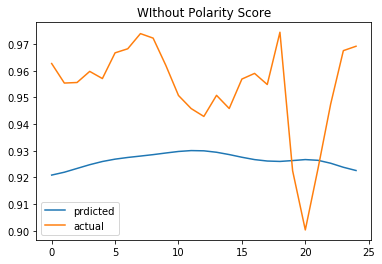

In [162]:
plt.plot(data_ann_pred+0.02,label="prdicted")
plt.plot(adj_Y_test_gen_test,label="actual")
plt.title("WIthout Polarity Score")
#plt.xlim(400,420)
plt.legend()

In [163]:
from sklearn.metrics import r2_score
r2_score(data_ann_pred+0.02,adj_Y_test_gen_test)

-171.01267375241628

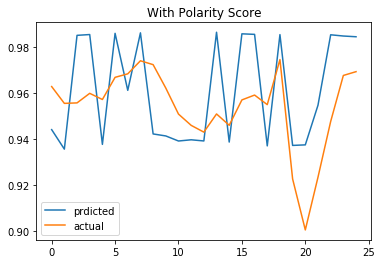

In [164]:
plt.plot(data_ann_pred_with_ps,label="prdicted")
plt.plot(adj_Y_test_gen_test,label="actual")
plt.title("With Polarity Score")
#plt.xlim(400,420)
plt.legend()

In [165]:
from sklearn.metrics import r2_score
r2_score(data_ann_pred_with_ps,adj_Y_test_gen_test)


-0.005638673340590872